<h1 "style="font-family: Arial; font-size:2.95em;color:purple; font-style:bold""> Predictiong Red Hat Business Vlue </h1>
                <p> Comme la plupart des entreprises, Red Hat est capable de recueillir au fil du temps de nombreuses informations sur le comportement des personnes qui interagissent avec elles. Ils sont à la recherche de meilleures méthodes d’utilisation de ces données comportementales pour prédire quelles personnes ils doivent contacter, et même quand et comment les aborder.
Dans le cadre de ce concours, Kagglers doit créer un algorithme de classification qui identifie avec précision les clients qui présentent le plus de valeur ajoutée potentielle pour Red Hat, en fonction de leurs caractéristiques et de leurs activités.
Avec un modèle de prévision amélioré en place, Red Hat sera en mesure de hiérarchiser les ressources de manière plus efficace afin de générer davantage d'activités et de mieux servir leurs clients.
Pour relever  ce genre de défi nous serons amenés à suivre le processus de la Science de données.
 </p>

<h4 style="font-size:1.5em;color:#2467C0">Compréhension du métier</h4><p>
Cette étape sert de  compréhension de  l’objectif du problème en science de données. 
Le défi de ce projet  est de prédire la valeur commerciale potentielle d’une personne ayant exercé une activité spécifique au sein de la compagnie Red hat. Le résultat de cette valeur est défini par un champ booléen oui / non attaché à chaque activité unique dans le fichier csv d'activité. Le champ de résultat nommé « outcome » indique si chaque personne a terminé le résultat dans un délai déterminé après chaque activité unique
Etant donné que nous devons prédire si chaque personne a terminé l’activité dans le délai. Il s’agit donc de construire un classifieur binaire pour identifier quels agents ont terminé l’activité dans le délai.</p>


<h4 style="font-size:1.5em;color:#2467C0">Préparation des données </4>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

<h4 style="font-size:1.5em;color:#2467C0">Importation de 3 fichiers csv pour former notre dataset</h4>

In [2]:
act_train = pd.read_csv('D:/5èmeannée2ite/Projet kaggle/dataset/act_train.csv')
act_test = pd.read_csv('D:/5èmeannée2ite/Projet kaggle/dataset/act_test.csv')
people = pd.read_csv('D:/5èmeannée2ite/Projet kaggle/dataset/people.csv')


<p style="font-size:1.5em;color:#2467C0" >Jointure entre nos 3 fichiers csv en utilisant la fonction merge de pandas </p> 
<p style="font-size:1.5em;color:#2467C0">obtention de deux dataframe <p>
<p>dataframe du training: df_train  </p>
  <p>dataframe  du test : df_test  <p>

In [3]:
df_train = pd.merge(act_train, people , on='people_id', suffixes=("_act", ""))
df_test = pd.merge(act_test, people , on='people_id', suffixes=("_act", ""))


indexation de  nos dataframe avec le champ "activity_id"

In [4]:
df_train = df_train.set_index("activity_id")
df_test = df_test.set_index("activity_id")

In [5]:
df_train.shape

(2197291, 54)

In [6]:
df_train.head()

,people_id,date_act,activity_category,char_1_act,char_2_act,char_3_act,char_4_act,char_5_act,char_6_act,char_7_act,...,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
activity_id,,,,,,,,,,,,,,,,,,,,,
act2_1734928,ppl_100,2023-08-26,type 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,True,False,False,True,True,True,False,36
act2_2434093,ppl_100,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,True,False,False,True,True,True,False,36
act2_3404049,ppl_100,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,True,False,False,True,True,True,False,36
act2_3651215,ppl_100,2023-08-04,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,True,False,False,True,True,True,False,36
act2_4109017,ppl_100,2023-08-26,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,True,False,False,True,True,True,False,36


In [7]:
df_train.columns


Index(['people_id', 'date_act', 'activity_category', 'char_1_act',
       'char_2_act', 'char_3_act', 'char_4_act', 'char_5_act', 'char_6_act',
       'char_7_act', 'char_8_act', 'char_9_act', 'char_10_act', 'outcome',
       'char_1', 'group_1', 'char_2', 'date', 'char_3', 'char_4', 'char_5',
       'char_6', 'char_7', 'char_8', 'char_9', 'char_10', 'char_11', 'char_12',
       'char_13', 'char_14', 'char_15', 'char_16', 'char_17', 'char_18',
       'char_19', 'char_20', 'char_21', 'char_22', 'char_23', 'char_24',
       'char_25', 'char_26', 'char_27', 'char_28', 'char_29', 'char_30',
       'char_31', 'char_32', 'char_33', 'char_34', 'char_35', 'char_36',
       'char_37', 'char_38'],
      dtype='object')

<p style="font-size:1.5em;color:#2467C0">Vérifications des données Manquantes </p>

In [8]:
df_train.isnull().sum()

people_id                  0
date_act                   0
activity_category          0
char_1_act           2039676
char_2_act           2039676
char_3_act           2039676
char_4_act           2039676
char_5_act           2039676
char_6_act           2039676
char_7_act           2039676
char_8_act           2039676
char_9_act           2039676
char_10_act           157615
outcome                    0
char_1                     0
group_1                    0
char_2                     0
date                       0
char_3                     0
char_4                     0
char_5                     0
char_6                     0
char_7                     0
char_8                     0
char_9                     0
char_10                    0
char_11                    0
char_12                    0
char_13                    0
char_14                    0
char_15                    0
char_16                    0
char_17                    0
char_18                    0
char_19       

<p style="font-size:1.5em;color:#2467C0">Suppressions des prédicteurs qui contiennent plus de 95% de données manquantes</p>

In [9]:
for i in range(1, 10):
        df_train.drop(['char_' + str(i)+'_act'],axis=1,inplace=True)

Faire la meme chose pour le test

In [10]:
for i in range(1, 10):
        df_test.drop(['char_' + str(i)+'_act'],axis=1,inplace=True)

In [11]:
df_test.drop(['char_10_act'],axis=1,inplace=True)

In [12]:
df_train.drop(['char_10_act'],axis=1,inplace=True)

Vérification. nous constatons très bien que notre dataset ne contient plus des valeurs manquantes 

In [13]:
df_train.isnull().sum()

people_id            0
date_act             0
activity_category    0
outcome              0
char_1               0
group_1              0
char_2               0
date                 0
char_3               0
char_4               0
char_5               0
char_6               0
char_7               0
char_8               0
char_9               0
char_10              0
char_11              0
char_12              0
char_13              0
char_14              0
char_15              0
char_16              0
char_17              0
char_18              0
char_19              0
char_20              0
char_21              0
char_22              0
char_23              0
char_24              0
char_25              0
char_26              0
char_27              0
char_28              0
char_29              0
char_30              0
char_31              0
char_32              0
char_33              0
char_34              0
char_35              0
char_36              0
char_37              0
char_38    

In [14]:
df_test.isnull().sum()

people_id            0
date_act             0
activity_category    0
char_1               0
group_1              0
char_2               0
date                 0
char_3               0
char_4               0
char_5               0
char_6               0
char_7               0
char_8               0
char_9               0
char_10              0
char_11              0
char_12              0
char_13              0
char_14              0
char_15              0
char_16              0
char_17              0
char_18              0
char_19              0
char_20              0
char_21              0
char_22              0
char_23              0
char_24              0
char_25              0
char_26              0
char_27              0
char_28              0
char_29              0
char_30              0
char_31              0
char_32              0
char_33              0
char_34              0
char_35              0
char_36              0
char_37              0
char_38              0
dtype: int6

In [15]:
df_train.shape

(2197291, 44)

In [16]:
df_train.dtypes

people_id            object
date_act             object
activity_category    object
outcome               int64
char_1               object
group_1              object
char_2               object
date                 object
char_3               object
char_4               object
char_5               object
char_6               object
char_7               object
char_8               object
char_9               object
char_10                bool
char_11                bool
char_12                bool
char_13                bool
char_14                bool
char_15                bool
char_16                bool
char_17                bool
char_18                bool
char_19                bool
char_20                bool
char_21                bool
char_22                bool
char_23                bool
char_24                bool
char_25                bool
char_26                bool
char_27                bool
char_28                bool
char_29                bool
char_30             

In [17]:
df_train.count()

people_id            2197291
date_act             2197291
activity_category    2197291
outcome              2197291
char_1               2197291
group_1              2197291
char_2               2197291
date                 2197291
char_3               2197291
char_4               2197291
char_5               2197291
char_6               2197291
char_7               2197291
char_8               2197291
char_9               2197291
char_10              2197291
char_11              2197291
char_12              2197291
char_13              2197291
char_14              2197291
char_15              2197291
char_16              2197291
char_17              2197291
char_18              2197291
char_19              2197291
char_20              2197291
char_21              2197291
char_22              2197291
char_23              2197291
char_24              2197291
char_25              2197291
char_26              2197291
char_27              2197291
char_28              2197291
char_29       

Transformations des types de prédicteurs en type numerique

In [18]:
df_train['activity_category']=df_train.activity_category.str.split(' ').str[1]


In [19]:
df_test['activity_category']=df_test.activity_category.str.split(' ').str[1]

In [20]:
df_train=df_train.astype({"activity_category":'int64'},)
for i in range(11, 38):
       df_train=df_train.astype({"char_"+ str(i):'int32'},)
       

In [21]:
df_test=df_test.astype({"activity_category":'int64'},)
for i in range(11, 38):
       df_test=df_test.astype({"char_"+ str(i):'int32'},)
       

In [22]:
df_train['group_1']=df_train.group_1.str.split(' ').str[1]
df_train=df_train.astype({"group_1":'int64'},)

In [23]:
df_test['group_1']=df_test.group_1.str.split(' ').str[1]
df_test=df_test.astype({"group_1":'int64'},)


In [24]:
for i in range(1,10):
    df_train['char_'+str(i)]= df_train['char_'+str(i)].str.split(' ').str[1]
    df_train=df_train.astype({"char_"+ str(i):'int32'},)

In [25]:
for i in range(1,10):
    df_test['char_'+str(i)]= df_test['char_'+str(i)].str.split(' ').str[1]
    df_test=df_test.astype({"char_"+ str(i):'int32'},)

In [26]:
df_train=df_train.astype({"char_10":'int32'},)

In [27]:
df_test=df_test.astype({"char_10":'int32'},)

Suppressions des colonnes qui ne serviront à rien dans l'apprentissage du model

In [28]:
df_train.drop(['people_id'],axis=1,inplace=True)

In [29]:
df_test.drop(['people_id'],axis=1,inplace=True)

Transformation de la date en jour,mois,années,week-end

In [30]:
df_train['date'] = pd.to_datetime(df_train['date'], errors='coerce')
df_train['year'] = df_train['date'].dt.year
df_train['month'] = df_train['date'].dt.month
df_train['day'] = df_train['date'].dt.day
df_train['weekday'] = df_train['date'].dt.weekday
df_train['weekend'] = ((df_train.weekday == 0) | (df_train.weekday == 6)).astype(int)
df_train.drop('date', axis=1, inplace=True)


In [31]:
df_test['date'] = pd.to_datetime(df_test['date'], errors='coerce')
df_test['year'] = df_test['date'].dt.year
df_test['month'] = df_test['date'].dt.month
df_test['day'] =df_test['date'].dt.day
df_test['weekday'] = df_test['date'].dt.weekday
df_test['weekend'] = ((df_test.weekday == 0) | (df_test.weekday == 6)).astype(int)
df_test.drop('date', axis=1, inplace=True)

In [32]:
df_train['date_act'] = pd.to_datetime(df_train['date_act'], errors='coerce')
df_train['year1'] = df_train['date_act'].dt.year
df_train['month1'] = df_train['date_act'].dt.month
df_train['day1'] = df_train['date_act'].dt.day
df_train['weekday1'] = df_train['date_act'].dt.weekday
df_train['weekend1'] = ((df_train.weekday == 0) | (df_train.weekday == 6)).astype(int)
df_train.drop('date_act', axis=1, inplace=True)


In [33]:
df_test['date_act'] = pd.to_datetime(df_test['date_act'], errors='coerce')
df_test['year1'] = df_test['date_act'].dt.year
df_test['month1'] = df_test['date_act'].dt.month
df_test['day1'] = df_test['date_act'].dt.day
df_test['weekday1'] = df_test['date_act'].dt.weekday
df_test['weekend1'] = ((df_test.weekday == 0) | (df_train.weekday == 6)).astype(int)
df_test.drop('date_act', axis=1, inplace=True)


In [ ]:
sns.distplot(df_train['char_38'],
            color='r')
sns.set(rc={'figure.figsize':(5,5
                             )})
plt.show()

In [ ]:
df_train.info()



<h3 style="font-size:2em;color:#2467C0">la visualization de données</h3>


In [ ]:
df_train.plot(column='char_38', figsize=(15,10))

In [ ]:
import seaborn as sns
sns.distplot(df_train['group_1'])
plt.show()

In [ ]:
import seaborn as sns
sns.distplot(df_train['char_38'])
plt.show()

In [ ]:

barplot(counts, main="Red Hat - Outcome vs People Char 2",
        xlab="People Char 2", col=c("darkblue","red"),
        legend = rownames(df_train.char_2,df_train.outcome))

# Apprentisssage du modèle 


<p style="font-size:1em;color:#2467C0">Nous allons séparer le dataframe du trainning en train et test en faisant le hold out pour savoir la performance de notre algorithme <p>

In [34]:
from sklearn.model_selection import train_test_split
X = df_train.drop(['outcome'],axis=1)
y = df_train['outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33, random_state=42 )

<h4 style="font-size:1.5em;color:#2467C0">XGBOOST </h4>
    <p style="font-size:1em;color:#2467C0"> Auc pour calculer la mesure de performance de notre model </p>

In [35]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
xg = xgb.XGBClassifier()
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)
metrics.roc_auc_score(y_test, y_pred)

0.874867415784709

<h4 style="font-size:1.5em;color:#2467C0">LightGBM Classifier</h4>


In [36]:

from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(random_state=5)

lgbm.fit(X, y)

y_pred = lgbm.predict(X_test)
metrics.roc_auc_score(y_test, y_pred)


0.8941221183652658

<h4 style="font-size:1.5em;color:#2467C0">KNNr</h4>


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
accuracy_score(y_true = y_test, y_pred = predictions)


<h4 style="font-size:1.5em;color:#2467C0">SVM </4>

In [ ]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
metrics.roc_auc_score(y_test, y_pred)

<h4 style="font-size:1.5em;color:#2467C0">Arbre de decision </h4>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
arbre=DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
arbre.fit(X_train, y_train)
y_predd = arbre.predict(X_test)
metrics.roc_auc_score(y_test, y_predd)

<h4 style="font-size:1.5em;color:#2467C0">Naif Baye</h4>

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
accuracy_score(y_true = y_test, y_pred = predictions)

<h4 style="font-size:1.5em;color:#2467C0">K-means</h4>

In [ ]:
from sklearn.cluster import KMeans
k_classifier = KMeans(n_clusters=2)
k_classifier.fit(X_train)
predictions = k_classifier.predict(X_test)
accuracy_score(y_true = y_test, y_pred = predictions)

<h4 style="font-size:1.5em;color:#2467C0">Random Forest</h4>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

<h4 style="font-size:1.5em;color:#2467C0">Logistic Regression</h4>

In [ ]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)
predictions = logisticRegr.predict(x_test)
# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print(score)

<h4 style="font-size:1.5em;color:#2467C0">AdaBoosting</h4>

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

<h4 style="font-size:1.5em;color:#2467C0">Gradient Boosting</h4>

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(x_train, y_train)
> GradientBoostingClassifier(criterion=’friedman_mse’, init=None,
 learning_rate=0.1, loss=’deviance’, max_depth=3,
 max_features=None, max_leaf_nodes=None,
 min_impurity_split=1e-07, min_samples_leaf=1,
 min_samples_split=2, min_weight_fraction_leaf=0.0,
 n_estimators=100, presort=’auto’, random_state=None,
 subsample=1.0, verbose=0, warm_start=False)
y_pred = model.predict(x_test)
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

# Reduction de la dimentionalité 

# Features Selection

<h2 "style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"">Correlation par cible </2>

In [ ]:
df_train['outcome'].corr(df_train['char_38'])


In [ ]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [ ]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'outcome')['outcome'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Matrice de correlation entre la sortie "outcome" et les features .
pour savoir quelle features servirons à apprendre le model de prediction 

In [ ]:
import seaborn as sns
import numpy as np
k = 10 #number of variables for heatmap
corrmat = df_train.corr()
cols = corrmat.nlargest(k, 'outcome')['outcome'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
corr_with_Outcome = df_train.corr()["outcome"].sort_values(ascending=False)
plt.figure(figsize=(16,7))
corr_with_Outcome.drop("outcome").plot.bar()
plt.show()

Les Features importants pour la prédiction 

In [ ]:
features=['char_38','char_2','char_36','char_34','char_37','char_25','char_17','char_13','char_22','char_19',
          'char_32','char_21','char_16','char_28','char_23','char_20','char_10','char_15','char_31','char_14'
          ,'char_27','char_11','char_12','char_24','char_35','char_33','char_18','char_30','char_29','char_26','char_9','year','month','year1']

In [ ]:
target=['outcome']

Construction d'un nouveau dataframe train avec les features importants et la sortie "outcome"

In [ ]:
df1 = df_train[features + target]

Construction d'un nouveau dataframe test avec les features importants sans la sortie "outcome" qui sera prédite après l'apprentissage du modèle

In [ ]:
df2 = df_test[features]

In [ ]:
df1.shape

In [ ]:
df2.shape

In [ ]:
df1.head()


<h4 style="font-size:1.5em;color:#2467C0">Apprentisssage du modèle <h/4>

In [ ]:
from sklearn.model_selection import train_test_split
X = df1.drop(['outcome'],axis=1)
y = df1['outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33, random_state=42 )

<h4 style="font-size:1.5em;color:#2467C0">Xgboost</h4>

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
xg = xgb.XGBClassifier()
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)
metrics.roc_auc_score(y_test, y_pred)

<h4 style="font-size:1.5em;color:#2467C0">LightGBM Classifier</h4>


In [ ]:

from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(random_state=5)

lgbm.fit(X, y)

y_pred = lgbm.predict(X_test)
metrics.roc_auc_score(y_test, y_pred)


<h4 style="font-size:1.5em;color:#2467C0">KNNr</h4>


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
accuracy_score(y_true = y_test, y_pred = predictions)


<h4 style="font-size:1.5em;color:#2467C0">SVM </4>

In [ ]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
metrics.roc_auc_score(y_test, y_pred)

<h4 style="font-size:1.5em;color:#2467C0">Arbre de decision </h4>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
arbre=DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
arbre.fit(X_train, y_train)
y_predd = arbre.predict(X_test)
metrics.roc_auc_score(y_test, y_predd)

<h4 style="font-size:1.5em;color:#2467C0">Naif Baye</h4>

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
accuracy_score(y_true = y_test, y_pred = predictions)

<h4 style="font-size:1.5em;color:#2467C0">K-means</h4>

In [ ]:
from sklearn.cluster import KMeans
k_classifier = KMeans(n_clusters=2)
k_classifier.fit(X_train)
predictions = k_classifier.predict(X_test)
accuracy_score(y_true = y_test, y_pred = predictions)

<h4 style="font-size:1.5em;color:#2467C0">Random Forest</h4>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

<h4 style="font-size:1.5em;color:#2467C0">Logistic Regression</h4>

In [ ]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)
predictions = logisticRegr.predict(x_test)
# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print(score)

<h4 style="font-size:1.5em;color:#2467C0">AdaBoosting</h4>

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

<h4 style="font-size:1.5em;color:#2467C0">Gradient Boosting</h4>

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(x_train, y_train)
> GradientBoostingClassifier(criterion=’friedman_mse’, init=None,
 learning_rate=0.1, loss=’deviance’, max_depth=3,
 max_features=None, max_leaf_nodes=None,
 min_impurity_split=1e-07, min_samples_leaf=1,
 min_samples_split=2, min_weight_fraction_leaf=0.0,
 n_estimators=100, presort=’auto’, random_state=None,
 subsample=1.0, verbose=0, warm_start=False)
y_pred = model.predict(x_test)
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

# Seuil de variance

In [35]:
from sklearn.feature_selection import VarianceThreshold
vseuil=VarianceThreshold(0.1)

vseuil.fit_transform(df_train)


vseuil

a=df_train[df_train.columns[vseuil.get_support(indices=True)]].columns
a

Index(['activity_category', 'outcome', 'group_1', 'char_2', 'char_3', 'char_4',
       'char_5', 'char_6', 'char_7', 'char_8', 'char_9', 'char_10', 'char_11',
       'char_12', 'char_13', 'char_14', 'char_15', 'char_16', 'char_17',
       'char_18', 'char_19', 'char_20', 'char_21', 'char_22', 'char_23',
       'char_24', 'char_25', 'char_26', 'char_27', 'char_28', 'char_29',
       'char_30', 'char_31', 'char_32', 'char_33', 'char_34', 'char_35',
       'char_36', 'char_37', 'char_38', 'year', 'month', 'day', 'weekday',
       'year1', 'month1', 'day1', 'weekday1'],
      dtype='object')

In [36]:
features_seuil=['activity_category', 'outcome', 'group_1', 'char_2', 'char_3', 'char_4',
       'char_5', 'char_6', 'char_7', 'char_8', 'char_9', 'char_10', 'char_11',
       'char_12', 'char_13', 'char_14', 'char_15', 'char_16', 'char_17',
       'char_18', 'char_19', 'char_20', 'char_21', 'char_22', 'char_23',
       'char_24', 'char_25', 'char_26', 'char_27', 'char_28', 'char_29',
       'char_30', 'char_31', 'char_32', 'char_33', 'char_34', 'char_35',
       'char_36', 'char_37', 'char_38', 'year', 'month', 'day', 'weekday',
       'year1', 'month1', 'day1', 'weekday1']

In [37]:
df=df_train[features_seuil]

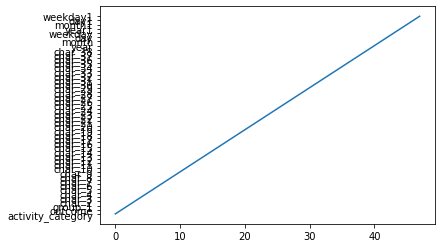

In [38]:
import matplotlib.pyplot as plt
plt.plot(a)

In [39]:
from sklearn.model_selection import train_test_split
X = df.drop(['outcome'],axis=1)
y = df['outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33, random_state=42 )

<h4 style="font-size:1.5em;color:#2467C0">Xgboost</h4>

In [40]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
xg = xgb.XGBClassifier()
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)
metrics.roc_auc_score(y_test, y_pred)

0.874867415784709

<h4 style="font-size:1.5em;color:#2467C0">LightGBM Classifier</h4>


In [41]:

from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(random_state=5)

lgbm.fit(X, y)

y_pred = lgbm.predict(X_test)
metrics.roc_auc_score(y_test, y_pred)


0.8934937398495044

<h4 style="font-size:1.5em;color:#2467C0">KNNr</h4>


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
accuracy_score(y_true = y_test, y_pred = predictions)


<h4 style="font-size:1.5em;color:#2467C0">SVM </4>

In [ ]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
metrics.roc_auc_score(y_test, y_pred)

<h4 style="font-size:1.5em;color:#2467C0">Arbre de decision </h4>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
arbre=DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
arbre.fit(X_train, y_train)
y_predd = arbre.predict(X_test)
metrics.roc_auc_score(y_test, y_predd)

<h4 style="font-size:1.5em;color:#2467C0">Naif Baye</h4>

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
accuracy_score(y_true = y_test, y_pred = predictions)

<h4 style="font-size:1.5em;color:#2467C0">K-means</h4>

In [ ]:
from sklearn.cluster import KMeans
k_classifier = KMeans(n_clusters=2)
k_classifier.fit(X_train)
predictions = k_classifier.predict(X_test)
accuracy_score(y_true = y_test, y_pred = predictions)

<h4 style="font-size:1.5em;color:#2467C0">Random Forest</h4>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

<h4 style="font-size:1.5em;color:#2467C0">Logistic Regression</h4>

In [ ]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)
predictions = logisticRegr.predict(x_test)
# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print(score)

<h4 style="font-size:1.5em;color:#2467C0">AdaBoosting</h4>

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

<h4 style="font-size:1.5em;color:#2467C0">Gradient Boosting</h4>

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(x_train, y_train)
> GradientBoostingClassifier(criterion=’friedman_mse’, init=None,
 learning_rate=0.1, loss=’deviance’, max_depth=3,
 max_features=None, max_leaf_nodes=None,
 min_impurity_split=1e-07, min_samples_leaf=1,
 min_samples_split=2, min_weight_fraction_leaf=0.0,
 n_estimators=100, presort=’auto’, random_state=None,
 subsample=1.0, verbose=0, warm_start=False)
y_pred = model.predict(x_test)
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

# Features Exploration and Engineering
##### Nous allons procéder maintenant à une analyse approfondie pour extraire les caractéristiques importantes

In [ ]:
data_train=df_train

In [ ]:
Y=data_train['outcome'].values


In [ ]:
X=data_train.drop(['outcome'],axis=1).values

In [ ]:
colnames=data_train.columns

In [ ]:
# définir un dictionnaire pour stocker nos rankings 
ranks = {}
# créer une fonction qui stocke le classement des caractéristiques 
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import SGDClassifier
# construire un modèle de régression linéaire 
lr = SGDClassifier(max_iter=10, tol=1e-3)
lr.fit(X,Y)
# arrêt - jusqu'à la dernière caractéristique 
rfe = RFE(lr, n_features_to_select=1, verbose =3 )
rfe.fit(X,Y)
ranks["RFE"] = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)

In [ ]:
#linear
lr = SGDClassifier(max_iter=10, tol=1e-3)
lr.fit(X,Y)
ranks["SGDClassifier"] = ranking(lr.coef_,colnames)

#  Ridge 
from sklearn.linear_model import RidgeClassifier

ridge = RidgeClassifier
()
ridge.fit(X,Y)
ranks['Ridge'] = ranking(np.abs(ridge.coef_), colnames)

#  Lasso
from sklearn.linear_model import LassoCV

lasso = LassoCV(cv=5, random_state=0)
lasso.fit(X, Y)
ranks["Lasso"] = ranking(np.abs(lasso.coef_), colnames)

#Random Forrest
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X,Y)
ranks["RF"] = ranking(rf.feature_importances_, colnames);

In [ ]:
# mettre la moyenne dans un dataframe Pandas
meanplot = pd.DataFrame(list(r.items()), columns= ['Feature','Mean Ranking'])

# Trier le  dataframe
meanplot = meanplot.sort_values('Mean Ranking', ascending=False)

In [ ]:
import seaborn as sns
sns.factorplot(x="Mean Ranking", y="Feature", data = meanplot, kind="bar", 
               size=14, aspect=1.9, palette='coolwarm')

<h4 style="font-size:1.5em;color:#2467C0">Prediction avec tout le dataframe train et la prédictiction de la sortie "outcome" avc le test </h4>

In [ ]:
y_train1 = df_train.outcome
x_train1 = df_train.drop(['outcome'], axis=1)
x_test1=df_test

In [ ]:
x_test1

In [ ]:

lgbm = LGBMClassifier(random_state=5)

lgbm.fit(x_train1, y_train1)

y_pred1 = lgbm.predict(x_test1)
y_test1=lgbm.predict(x_train1)



In [ ]:
df_test.shape

In [ ]:
y_pred1[:500]

In [ ]:
submission1 = pd.DataFrame({
        "activity_id": df_test.index,
        "outcome": y_pred1
    })

In [ ]:
submission1

In [ ]:
submission1.to_csv('./dataset/sample_submission1.csv', index=False)

Deep Learning

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from tensorflow.keras import backend as K

from tensorflow.keras.callbacks import TensorBoard

In [ ]:
from subprocess import check_output


In [ ]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

In [ ]:
model = Sequential()

model.add(Flatten())
model.add(Dense(128, activation= 'relu' ))
model.add(Dense(50, activation= 'relu' ))
model.add(Dense(10, activation= 'softmax' ))
  # Compile model


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
%reload_ext tensorboard


In [ ]:
import datetime,os
logdir = os.path.join("logs\\fit\\", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = TensorBoard(logdir, histogram_freq=1)
model.fit(X_train.values, y_train,
          epochs=10,callbacks=[tensorboard_callback])


In [ ]:
%tensorboard --logdir logs/fit

In [ ]:
score = model.evaluate(X_test.values, y_test)
print( score)

In [ ]:
test_acc = model.evaluate(X_test.values, y_test)

print('\nTest accuracy:', test_acc)

In [ ]:
X_test.values